<a href="https://colab.research.google.com/github/Feetly/ML/blob/master/180020006_Prml_Midsems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Intro (Importing Libraries)**

Programming :  Midsems

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)

Student Name : Dhruv Jain

Roll no. : 180020006

Link to Colab File : 
https://colab.research.google.com/github/Feetly/ML/blob/master/180020006_Prml_Midsems.ipynb

In [6]:
#@title Importing Libraries, Click to See Code { run: "auto", display-mode: "form" }
from scipy.stats import multivariate_normal
import google.colab.files as files
import google.colab.drive as drive
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sympy import *
import seaborn as sns
import pandas as pd
import numpy as np
import functools
import operator
import warnings
import random
import math
import cv2
import sys
warnings.filterwarnings('ignore')

In [ ]:
#@title Importing Files, Click to See Code { run: "auto", display-mode: "code" }
#files.upload()
#data = pd.read_csv("quiz1_dataset.csv",header=None)
#data.describe() , data.info(), data.head()

#**Q1**

##**Q1 a.**

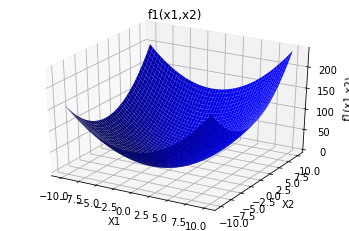

f1(x1,x2): Convex


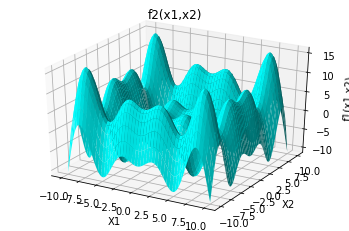

f2(x1,x2): Non-Convex


In [ ]:
#@title Data/Function with Plots Generator Q1 a. 1., Click to See Code { run: "auto", display-mode: "code" }
#Random data generation
x1, x2 = [np.linspace(-10, 10, 1000)]*2
X1, X2 = np.meshgrid(x1, x2)

def fn1(X1,X2):
  return X1*X1 + X2*X2 + 2*X1 + 2*X2

def fn2(X1,X2):
  return X1*np.sin(X1) + X2*np.sin(X2)

#Function Generation
f1 = fn1(X1,X2)
f2 = fn2(X1,X2)

#Plots
a1 = plt.axes(projection='3d')
a1.plot_surface(X1,X2, f1, color='b')
a1.set_title("f1(x1,x2)")
a1.set_xlabel('X1')
a1.set_ylabel('X2')
a1.set_zlabel('f1(x1,x2)')
plt.show()
print("f1(x1,x2): Convex")

a2 = plt.axes(projection='3d')
a2.plot_surface(X1,X2, f2, color='cyan')
a2.set_title("f2(x1,x2)")
a2.set_xlabel('X1')
a2.set_ylabel('X2')
a2.set_zlabel('f1(x1,x2)')
plt.show()
print("f2(x1,x2): Non-Convex")

In [ ]:
#@title Analytic Minimum Value Q1 a. 2., Click to See Code { run: "auto", display-mode: "code" }

minf1, minf2 = [99999]*2
x1min1 , x2min1, x1min2, x2min2 = [0]*4

for i in range(len(x1)):
    for j in range(len(x2)):
        if f1[i,j] < minf1:
            minf1 = f1[i,j]
            x1min1, x2min1 = x1[i], x2[j]
        if f2[i,j] < minf2:
            minf2 = f2[i,j]
            x1min2, x2min2 = x1[i], x2[j]

print("Minimum value of f1(x1,x2) =", minf1, "\tat : (x1, x2) = (",x1min1, ",",x2min1,")")
print("Minimum value of f2(x1,x2) =", minf1, "\tat : (x1, x2) = (",x1min2, ",",x2min2,")")

Minimum value of f1(x1,x2) = -1.9998376755133511 	at : (x1, x2) = ( -0.9909909909909906 , -0.9909909909909906 )
Minimum value of f2(x1,x2) = -1.9998376755133511 	at : (x1, x2) = ( -10.0 , -10.0 )


In [ ]:
#@title Gradient Descend Minimum Value Q1 a. 3. i., Click to See Code { run: "auto", display-mode: "code" }

df = pd.DataFrame(data=[], columns = ['Function','Alpha','X1_init','X2_init','X1_final','X2_final','Minimum_Value'],index =['Run1','Run2','Run3','Run4','Run5','Run6','Run7','Run8','Run9','Run10']) 

print("For Fn1:-")
for i in range(10):
    alpha, x1_gd , x2_gd = random.random(), random.uniform(-10,10) , random.uniform(-10,10)
    df['Function']['Run'+str(i+1)] = 'Function 1'
    df['Alpha']['Run'+str(i+1)] = round(alpha,5)
    df['X1_init']['Run'+str(i+1)] = round(x1_gd,5)
    df['X2_init']['Run'+str(i+1)] = round(x2_gd,5)

    print("Run",i+1)
    print("\tLearning Rate :" , alpha)
    print("\tInitialized Values :  (x1, x2) =(",x1_gd,",",x2_gd,")")
    for j in range(10000):
        a , b = alpha*(2*x1_gd + 2), alpha*(2*x2_gd + 2) 
        x1_gd, x2_gd = x1_gd - a, x2_gd - b
        if (abs(a+b) < 0.000001) : break
    print("\tMinimum value of f1(x1,x2) =", fn1(x1_gd,x2_gd), "\tat : (x1, x2) = (",x1_gd,",",x2_gd,")\n")
    df['X1_final']['Run'+str(i+1)] = round(x1_gd,5)
    df['X2_final']['Run'+str(i+1)] = round(x1_gd,5)
    df['Minimum_Value']['Run'+str(i+1)] = round(fn1(x1_gd,x2_gd),5)

tmp = df.copy()

print("For Fn2:-")
for i in range(10):
    alpha, x1_gd , x2_gd = random.random(), random.uniform(-10,10) , random.uniform(-10,10)
    df['Function']['Run'+str(i+1)] = 'Function 2'
    df['Alpha']['Run'+str(i+1)] = round(alpha,5)
    df['X1_init']['Run'+str(i+1)] = round(x1_gd,5)
    df['X2_init']['Run'+str(i+1)] = round(x2_gd,5)
    print("Run",i+1)
    print("\tLearning Rate :" , alpha)
    print("\tInitialized Values :  (x1, x2) =(",x1_gd,",",x2_gd,")")
    for j in range(10000):
        a , b = alpha*(x1_gd*np.cos(x1_gd) + np.sin(x1_gd)), alpha*(x2_gd*np.cos(x2_gd) + np.sin(x2_gd)) 
        x1_gd, x2_gd = x1_gd - a, x2_gd - b
        if (abs(a+b) < 0.000001) : break
    print("\tMinimum value of f2(x1,x2) =", fn2(x1_gd,x2_gd), "\tat : (x1, x2) = (",x1_gd,",",x2_gd,")\n")
    df['X1_final']['Run'+str(i+1)] = round(x1_gd,5)
    df['X2_final']['Run'+str(i+1)] = round(x1_gd,5)
    df['Minimum_Value']['Run'+str(i+1)] = round(fn2(x1_gd,x2_gd),5)

df = pd.concat([tmp, df], axis= 0)

For Fn1:-
Run 1
	Learning Rate : 0.040304929241921306
	Initialized Values :  (x1, x2) =( -5.926063116465716 , -0.253666492212572 )
	Minimum value of f1(x1,x2) = -1.999999999831807 	at : (x1, x2) = ( -1.0000128225937899 , -0.9999980572860769 )

Run 2
	Learning Rate : 0.984040518771968
	Initialized Values :  (x1, x2) =( -5.801106673355547 , -8.418619303977355 )
	Minimum value of f1(x1,x2) = -1.999999999999874 	at : (x1, x2) = ( -0.9999998072515542 , -0.9999997021671387 )

Run 3
	Learning Rate : 0.06290544641470552
	Initialized Values :  (x1, x2) =( -5.437112024195616 , -2.5672086434614734 )
	Minimum value of f1(x1,x2) = -1.9999999999729132 	at : (x1, x2) = ( -1.0000049073862434 , -1.0000017333116893 )

Run 4
	Learning Rate : 0.49475609741904825
	Initialized Values :  (x1, x2) =( 7.246222692234333 , 9.122897722699971 )
	Minimum value of f1(x1,x2) = -2.0 	at : (x1, x2) = ( -0.9999999989536472 , -0.9999999987155184 )

Run 5
	Learning Rate : 0.2719730587639194
	Initialized Values :  (x1, x2)

Function: x**2 + 2*x 	Derivative: 2*x + 2
Function: x*sin(x) 	Derivative: x*cos(x) + sin(x)
Function: x**2 + 2*x 	Minimum at: -1
Function: x*sin(x) 	Minimum at: 0 and x = -tan(x) i.e 5 values


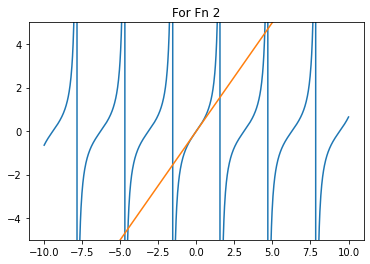

In [ ]:
#@title Normalized Equation Minimum Value Q1 a. 3. ii., Click to See Code { run: "auto", display-mode: "code" }
from sympy import *
x = symbols('x')
fn1 = (x**2) + (2*x)
fn2 = x*sin(x) 
fd1 = diff(fn1,x)
fd2 = diff(fn2,x)
s1 = solve(fd1,x)
print("Function:",fn1,"\tDerivative:",fd1)
print("Function:",fn2,"\tDerivative:",fd2)
print("Function:",fn1,"\tMinimum at:",s1[0])
print("Function:",fn2,"\tMinimum at:",0,"and x = -tan(x) i.e 5 values")

x = np.linspace(-10, 10, 1000)
plt.plot(x, np.tan(x))
plt.plot(x, x)
plt.ylim(-5, 5)
plt.title("For Fn 2")
plt.show()

In [ ]:
#@title Tabulated Resuls Q1 A., Click to See Code { run: "auto", display-mode: "code" }

df.head(20)

,Function,Alpha,X1_init,X2_init,X1_final,X2_final,Minimum_Value
Run1,Function 1,0.0403,-5.92606,-0.25367,-1.00001,-1.00001,-2
Run2,Function 1,0.98404,-5.80111,-8.41862,-1,-1,-2
Run3,Function 1,0.06291,-5.43711,-2.56721,-1,-1,-2
Run4,Function 1,0.49476,7.24622,9.1229,-1,-1,-2
Run5,Function 1,0.27197,7.2096,8.42413,-1,-1,-2
Run6,Function 1,0.38893,-5.74427,-6.43176,-1,-1,-2
Run7,Function 1,0.29344,8.09538,8.26253,-1,-1,-2
Run8,Function 1,0.89564,1.67297,-4.13652,-1,-1,-2
Run9,Function 1,0.15918,4.19897,-1.19188,-1,-1,-2
Run10,Function 1,0.41382,0.45325,0.53355,-1,-1,-2


Pros of Gradient Descend: 
1. No need of having a definate solution of derivative.
2. No need of having any functions to get derivative nd stuff.

Cons of Gradient Descend: 
1. Descend can stop due to local minima trap.
2. Can take alot time to converge.

Pros of Normal Equation: 
1. Less time consuming, direct results.
2. Can u used to get global minimum, no local minimum trap issue.

Cons of Normal Equation: 
1. No general solutions for roots of derivative i.e x = tan(x) no general solution.
2. Could interpret saddle or maxima point as minima if not careful.

##**Q1 b.**

**Difference**

Regression: It predicts continuous values and their output. Regression analysis is the statistical model that is used to predict the numeric data instead of labels. It can also identify the distribution trends based on the available data or historic data. Predicting a person's income based on various attributes such as age and experience is an example of creating a regression model.
Cost fn: Minimize the difference between predicted and actual target label. i.e Supervised
\begin{align}
\displaystyle \min_{\theta_0,\theta_1}\frac{1}{2m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2 \end{align}

Clustering: Clustering is quite literally the clustering or grouping up of data according to the similarity of data points and data patterns.The aim of this is to separate similar categories of data and differentiate them into localized regions. This way, when a new data point arrives, we can easily identify which group or cluster it belongs to. This is done for unstructured datasets where it is up to the machine to figure out the categories.
Cost fn: Minimize the difference between centroid and centroid of the points in that cluster. i.e Unsupervised
\begin{align}
&\min_{x} \sum_{i=1}^n \sum_{j=1}^k x_{ij} || p_i - c_j||^2\\
&\text{subject to:} \\
&\sum_{j=1}^k x_{ij} = 1 \quad \forall i\\
& c_j\textit{ is the centroid of cluster j}\\
&x_{ij} \in \{0,1\} \quad \forall i, j \\
 \end{align}

**Local Minimum Trap**

Regression: Gradient Descend can get trapped into local minima trap if data is not properly transformed and never reach global minima.

Clustering: Wrong initialsation of clustering can lead the code to fall into local minima trap as show in below example and never reach global minima.

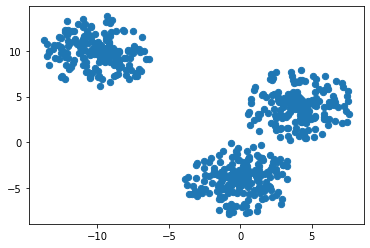

In [ ]:
#@title Data/Function with Plots Generator Q1 b. 1., Click to See Code { run: "auto", display-mode: "code" }

x1 = 4 * np.random.rand(200)
x2 = 6.28 * np.random.rand(200)
x3 = 4 * np.random.rand(200)
x4 = 6.28 * np.random.rand(200)
x5 = 4 * np.random.rand(200)
x6 = 6.28 * np.random.rand(200)

y1 = [ (x1*np.cos(x2) + 4) , (x1*np.sin(x2) + 4)]
y1 = np.reshape(y1,(2,len(y1[0])))  
y2 = [ (x3*np.cos(x4) - 10) , (x3*np.sin(x4) + 10) ]
y2 = np.reshape(y2,(2,len(y2[0])))
y3 = [ (x5*np.cos(x6) - 0) , (x5*np.sin(x6) - 4) ]
y3 = np.reshape(y3,(2,len(y3[0])))

y1 = np.concatenate((y1,y2,y3), axis=1).T

#Scatter plot of taken example
plt.scatter(y1[ : , 0], y1[ : , 1], s = 40)
plt.show()

Clustered Data  -->  Stuck in local minima Trap



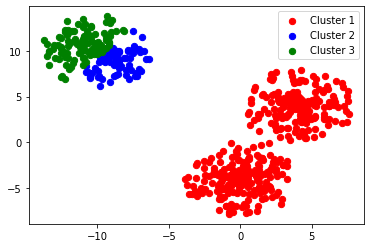

Cetroid of cluster 1 :  [2.049890854590375, -0.05995296724126645]
Cetroid of cluster 2 :  [-8.66299103898086, 8.878622153536577]
Cetroid of cluster 3 :  [-10.949601114046455, 10.607653468998338] 



In [ ]:
#@title Kmeans with Plots Q1 b. 2., Click to See Code { run: "auto", display-mode: "code" }

def distance(point, centroid):
    return np.sqrt(np.square(point[0]-centroid[0])+np.square(point[1]-centroid[1]))

centroid1, centroid2, centroid3 = [random.choice(y1),[-8, 8]], [random.choice(y1),[-10, 9]], [random.choice(y1),[-10, 10]]

for i in range(1,2):
    while True:
        cluster_1, cluster_2, cluster_3 = [centroid1[i]], [centroid2[i]], [centroid3[i]]
        for point in y1:

            if distance(point, centroid1[i]) < distance(point, centroid2[i]) and distance(point, centroid1[i]) < distance(point, centroid3[i]):
                cluster_1.append(point)
            elif distance(point, centroid2[i]) < distance(point, centroid1[i]) and distance(point, centroid2[i]) < distance(point, centroid3[i]):
                cluster_2.append(point)
            else:
                cluster_3.append(point)

        cluster_1, cluster_2, cluster_3 = np.asarray(cluster_1), np.asarray(cluster_2), np.asarray(cluster_3)

        x = lambda a : [np.mean(a[ : , 0]),np.mean(a[ : , 1])]
        a, b , c = x(cluster_1), x(cluster_2), x(cluster_3)
        if distance(centroid1[i],a)+distance(centroid2[i],b)+distance(centroid3[i],c) < 0.001 : break
        centroid1[i], centroid2[i], centroid3[i] = a, b ,c

    a = "Clustered Data  -->  No local minima Trap\n" if i==0 else "Clustered Data  -->  Stuck in local minima Trap\n"
    print(a)
    plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], s = 40, c = 'red')
    plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], s = 40, c = 'blue')
    plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], s = 40, c = 'green')
    plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
    plt.show()

    print("Cetroid of cluster 1 : ", centroid1[i])
    print("Cetroid of cluster 2 : ", centroid2[i])
    print("Cetroid of cluster 3 : ", centroid3[i],"\n")
    

**Local Minimum Trap Solution**
 
1. Do random initialisation of weights several times i.e 10 times preferably and choose the best weights corresponding to global minima.
2. Scale, Standardise and Transform data to have 0 mean and 1 variance to make it convex it for easy convergency to global minima.

Clustered Data  -->  No local minima Trap



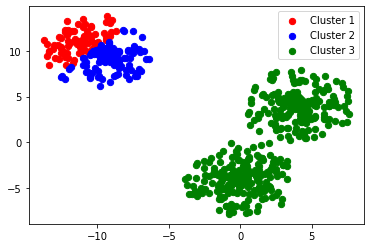

Cetroid of cluster 1 :  [-11.322618638630813, 11.05020397409096]
Cetroid of cluster 2 :  [-9.195770329246606, 9.174491185874755]
Cetroid of cluster 3 :  [2.049890854590375, -0.05995296724126645] 



In [ ]:
#@title Solve Trap., Click to See Code { run: "auto", display-mode: "code" }

for i in range(0,1):
    while True:
        cluster_1, cluster_2, cluster_3 = [centroid1[i]], [centroid2[i]], [centroid3[i]]
        for point in y1:

            if distance(point, centroid1[i]) < distance(point, centroid2[i]) and distance(point, centroid1[i]) < distance(point, centroid3[i]):
                cluster_1.append(point)
            elif distance(point, centroid2[i]) < distance(point, centroid1[i]) and distance(point, centroid2[i]) < distance(point, centroid3[i]):
                cluster_2.append(point)
            else:
                cluster_3.append(point)

        cluster_1, cluster_2, cluster_3 = np.asarray(cluster_1), np.asarray(cluster_2), np.asarray(cluster_3)

        x = lambda a : [np.mean(a[ : , 0]),np.mean(a[ : , 1])]
        a, b , c = x(cluster_1), x(cluster_2), x(cluster_3)
        if distance(centroid1[i],a)+distance(centroid2[i],b)+distance(centroid3[i],c) < 0.001 : break
        centroid1[i], centroid2[i], centroid3[i] = a, b ,c

    a = "Clustered Data  -->  No local minima Trap\n" if i==0 else "Clustered Data  -->  Stuck in local minima Trap\n"
    print(a)
    plt.scatter(cluster_1[ : , 0], cluster_1[ :, 1], s = 40, c = 'red')
    plt.scatter(cluster_2[ : , 0], cluster_2[ :, 1], s = 40, c = 'blue')
    plt.scatter(cluster_3[ : , 0], cluster_3[ :, 1], s = 40, c = 'green')
    plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
    plt.show()

    print("Cetroid of cluster 1 : ", centroid1[i])
    print("Cetroid of cluster 2 : ", centroid2[i])
    print("Cetroid of cluster 3 : ", centroid3[i],"\n")
    

#**Q2**

##**Q2 A. Preprocessing**

In [ ]:
#@title Data Input Q2 a., Click to See Code { run: "auto", display-mode: "code" }
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]


In [ ]:
#@title Data Balancing Q2 a., Click to See Code { run: "auto", display-mode: "code" }
class1 = df.loc[df['Class'] == 1]
class0 = df.loc[df['Class'] == 0]
class0 = class0.sample(n = len(class1))
balanced_df = class1.append(class0, ignore_index=True)
balanced_df = balanced_df.sample(frac = 1)

In [ ]:
#@title Data Removing Outliers Q2 a., Click to See Code { run: "auto", display-mode: "code" }
Q1, Q3 = balanced_df.quantile(0.25), balanced_df.quantile(0.75)
IQR = Q3 - Q1
balanced_df = balanced_df[~((balanced_df < (Q1 - 2.5 * IQR)) |(balanced_df > (Q3 + 2.5 * IQR))).all(axis=1)]

In [ ]:
#@title Data Normalizing Q2 a., Click to See Code { run: "auto", display-mode: "code" }
# Normalization
normalized_df = pd.DataFrame()
class_var = balanced_df['Class']

for feature_name in (balanced_df.iloc[:,:30]).columns:
    max_value = balanced_df[feature_name].max()
    min_value = balanced_df[feature_name].min()
    normalized_df[feature_name] = (balanced_df[feature_name] - min_value) / (max_value - min_value)

normalized_df['Class'] = class_var 

print(normalized_df)

         Time        V1        V2  ...       V28    Amount  Class
498  0.239716  0.896099  0.327094  ...  0.408415  0.010121      0
105  0.233103  0.963241  0.410689  ...  0.441384  0.000271      1
104  0.231993  0.960942  0.359610  ...  0.435602  0.000271      1
480  0.951678  0.768897  0.342541  ...  0.299314  0.010834      1
230  0.396404  0.527299  0.715611  ...  0.539692  0.000271      1
..        ...       ...       ...  ...       ...       ...    ...
217  0.379747  0.964290  0.305915  ...  0.420314  0.008647      1
409  0.832753  0.818255  0.295148  ...  0.433708  0.039239      1
896  0.916756  0.991470  0.322698  ...  0.414430  0.000271      0
102  0.214926  0.687338  0.163985  ...  0.225061  0.003336      1
406  0.829478  0.892511  0.380588  ...  0.322473  0.087959      1

[984 rows x 31 columns]


##**Q2 B. Data visulization nd Comment on Clustering**

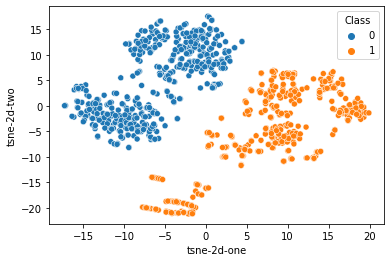

In [ ]:
#@title Data Visualization Q2 B., Click to See Code { run: "auto", display-mode: "code" }

transformed_df = TSNE(n_components=2, n_iter=300, random_state = 69).fit_transform(normalized_df)

df_subset = pd.DataFrame()
df_subset['Class'] = normalized_df['Class']
df_subset['tsne-2d-one'] = transformed_df[:,0]
df_subset['tsne-2d-two'] = transformed_df[:,1]

sns.scatterplot(x = "tsne-2d-one",y = "tsne-2d-two", hue = 'Class', data = df_subset, legend = "full")

**Results based on Data Visulaization done above in part A**

Observations:
1. Clusters are non-spherical.
2. Clusters are non-overlapping.
3. Clusters can have a clear decision boundary.

Conclusion/Comments: Based on above observation:
1. Agglomerative Clustering will not be of much help as the data is not in form of a Hierarchy.
2. DBSCAN Clustering will not be of much help as the decision boundary is clear from the figure and also data have a oval shape nd no overlap between clusters.
3. K-means Clustering can be useful here as two clusters are non-overlapping and distinct clusters can be drawn. K-means is a special case of Fuzzy C means Clustering, which can handle non-spherical shape clustering.
4. GMM Clustering can be very handy in this type of clusters, when clusters are non-overlapping and non-spherical. Group of high dimentional gaussians would best fit the data for best accuracy. 

##**Q2 C. Deciding Error Metric**

An evaluation measure to evaluate the
clustering algorithms, given the classes can be simple:

Mean of Squares of Difference in Predicted Label and Actual Label is my Error Metric.

\begin{align}
\displaystyle Error\ Metric = \frac{1}{m}\sum_{i=1}^{m} \left(ActualLabel^{(i)}-PredictedLabel^{(i)}\right)^2 \end{align}

Basically average of how many wrong predicted cluster points were found.

If Error metric is low, Model is better.
Since Its is a binary classification, all clusters can have either label as 0 or 1.

In [ ]:
#@title Error Metric
def error_calc(target,labels):
    labels2 = [(1 - labels[i])**2 for i in range(len(labels))] # Since there are only 2 Clusters, label names can be interchanged
    error1 = np.mean((np.array(labels) - np.array(target))**2)
    error2 = np.mean((np.array(labels2) - np.array(target))**2)
    return min(error1 , error2)

print('Error Metric:',error_calc([0,1,0,1,0,1],[1,1,1,0,1,0]))

Error Metric: 0.16666666666666666


         Time        V1        V2  ...       V28    Amount  Class
0    0.239716  0.896099  0.327094  ...  0.408415  0.010121      1
1    0.233103  0.963241  0.410689  ...  0.441384  0.000271      0
2    0.231993  0.960942  0.359610  ...  0.435602  0.000271      0
3    0.951678  0.768897  0.342541  ...  0.299314  0.010834      0
4    0.396404  0.527299  0.715611  ...  0.539692  0.000271      0
..        ...       ...       ...  ...       ...       ...    ...
979  0.379747  0.964290  0.305915  ...  0.420314  0.008647      1
980  0.832753  0.818255  0.295148  ...  0.433708  0.039239      1
981  0.916756  0.991470  0.322698  ...  0.414430  0.000271      0
982  0.214926  0.687338  0.163985  ...  0.225061  0.003336      1
983  0.829478  0.892511  0.380588  ...  0.322473  0.087959      1

[984 rows x 31 columns]

Error metric for K means = 0.2855691056910569 



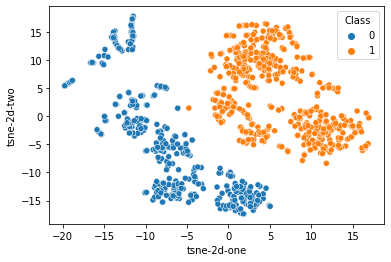

In [ ]:
#@title Kmeans with Plots Q2 C., Click to See Code { run: "auto", display-mode: "code" }

def dist_ndim(point , centroid):
    return np.mean(np.array((np.array(point) - np.array(centroid))**2))

df_list = normalized_df.values.tolist()

centroid1, centroid2 =  random.choice(df_list), random.choice(df_list)

while True:
    cluster_1, cluster_2 = [centroid1], [centroid2] 

    for j in range(len(df_list)):
        if dist_ndim(df_list[j], centroid1) < dist_ndim(df_list[j], centroid2):
            cluster_1.append(df_list[j])
            df_list[j].pop()
            df_list[j].append(1)
        else:
            cluster_2.append(df_list[j])
            df_list[j].pop()
            df_list[j].append(0)

    cluster1, cluster2 = pd.DataFrame(cluster_1), pd.DataFrame(cluster_2)

    tmp0 = cluster1.mean(axis = 0).values.tolist()
    tmp1 = cluster2.mean(axis = 0).values.tolist()

    if dist_ndim(centroid1,tmp0) < 0.0001 and dist_ndim(centroid2,tmp1) < 0.0001:
        break

    centroid1, centroid2 = tmp0, tmp1

kmeans_clustered_df = pd.DataFrame(df_list)
kmeans_clustered_df.columns = normalized_df.columns

print(kmeans_clustered_df)

x1 = normalized_df.iloc[:,30:].values.tolist()
x2 = kmeans_clustered_df.iloc[:,30:].values.tolist()

x1_flat = functools.reduce(operator.iconcat, x1, [])
x2_flat1 = functools.reduce(operator.iconcat, x2, [])

error = error_calc(x1_flat,x2_flat1)

print("\nError metric for K means =",error,'\n')

transformed_df = TSNE(n_components=2, n_iter=300, random_state = 69).fit_transform(kmeans_clustered_df)

df_subset = pd.DataFrame()
df_subset['Class'] = kmeans_clustered_df['Class']
df_subset['tsne-2d-one'] = transformed_df[:,0]
df_subset['tsne-2d-two'] = transformed_df[:,1]

sns.scatterplot(x = "tsne-2d-one",y = "tsne-2d-two", hue = 'Class', data = df_subset, legend = "full")

         Time        V1        V2  ...       V28    Amount  Class
0    0.239716  0.896099  0.327094  ...  0.408415  0.010121      0
1    0.233103  0.963241  0.410689  ...  0.441384  0.000271      1
2    0.231993  0.960942  0.359610  ...  0.435602  0.000271      1
3    0.951678  0.768897  0.342541  ...  0.299314  0.010834      1
4    0.396404  0.527299  0.715611  ...  0.539692  0.000271      1
..        ...       ...       ...  ...       ...       ...    ...
979  0.379747  0.964290  0.305915  ...  0.420314  0.008647      1
980  0.832753  0.818255  0.295148  ...  0.433708  0.039239      1
981  0.916756  0.991470  0.322698  ...  0.414430  0.000271      0
982  0.214926  0.687338  0.163985  ...  0.225061  0.003336      1
983  0.829478  0.892511  0.380588  ...  0.322473  0.087959      1

[984 rows x 31 columns]

Error metric for GMM = 0.0 



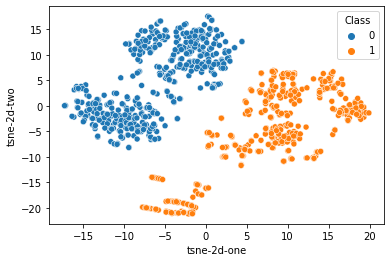

In [ ]:
#@title GMM with Plots Q2 C., Click to See Code { run: "auto", display-mode: "code" }

class GMM:
    def __init__(self, k: int, n_iters: int, tol: float, random_state: int):
        self.n_components, self.n_iters,self.tol  = k, n_iters, tol 
        np.random.seed(random_state),random.seed(random_state)

    def eStep(self, X):
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood

        log_likelihood = np.sum(np.log(np.sum(self.resp, axis = 1)))

        # normalize over all possible cluster assignments
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return log_likelihood

    def mStep(self, X):
        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = self.resp.sum(axis = 0)
        # weights
        self.weights = resp_weights / X.shape[0]
        # means
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        # covariance
        for k in range(self.n_components):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]

    def fit(self, X):

        cor = np.identity(31, dtype = float)
        # data's responsibility vector    
        self.resp = np.zeros((X.shape[0], self.n_components))
        # initialize parameters #self.covs = np.full(shape, np.cov(X.T))
        self.means = X[np.random.choice(X.shape[0], self.n_components)]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        self.covs = np.full((self.n_components, X.shape[1], X.shape[1]), cor*np.max(np.asarray(X),axis=0))
        log_likelihood, self.log_likelihood_trace, clr, mrk = 0, [], ['g','b','y','r'], ['*','X','.','+']

        for i in range(self.n_iters):
            log_likelihood_new = self.eStep(X)
            self.mStep(X)

            cluster_label=np.argmax(self.resp,axis=1) #Label Points            
            if abs(log_likelihood_new - log_likelihood) <= self.tol:
                break
            log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(log_likelihood)
            return cluster_label

norm_arr = normalized_df.to_numpy()

prediction = GMM(k = 2, n_iters = 300, tol = 1e-4, random_state = 9832122).fit(norm_arr)

gmm_clustered_df = pd.DataFrame()
gmm_clustered_df = gmm_clustered_df.append(normalized_df, ignore_index=True)
gmm_clustered_df['Class'] = prediction

print(gmm_clustered_df)
error_gmm = error_calc(x1_flat,prediction)
print("\nError metric for GMM =",error_gmm,'\n')

transformed_df = TSNE(n_components=2, n_iter=300, random_state = 69).fit_transform(gmm_clustered_df)

df_subset = pd.DataFrame()
df_subset['Class'] = gmm_clustered_df['Class']
df_subset['tsne-2d-one'] = transformed_df[:,0]
df_subset['tsne-2d-two'] = transformed_df[:,1]

sns.scatterplot(x = "tsne-2d-one",y = "tsne-2d-two", hue = 'Class', data = df_subset, legend = "full")

         Time        V1        V2  ...       V28    Amount  Class
0    0.239716  0.896099  0.327094  ...  0.408415  0.010121      0
1    0.233103  0.963241  0.410689  ...  0.441384  0.000271      0
2    0.231993  0.960942  0.359610  ...  0.435602  0.000271      0
3    0.951678  0.768897  0.342541  ...  0.299314  0.010834      0
4    0.396404  0.527299  0.715611  ...  0.539692  0.000271      0
..        ...       ...       ...  ...       ...       ...    ...
979  0.379747  0.964290  0.305915  ...  0.420314  0.008647      0
980  0.832753  0.818255  0.295148  ...  0.433708  0.039239      0
981  0.916756  0.991470  0.322698  ...  0.414430  0.000271      0
982  0.214926  0.687338  0.163985  ...  0.225061  0.003336      0
983  0.829478  0.892511  0.380588  ...  0.322473  0.087959      0

[984 rows x 31 columns]

Error metric for Agglomerative Clustering = 0.49898373983739835 



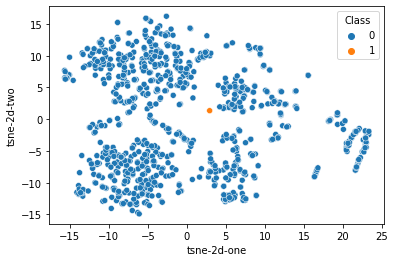

In [ ]:
#@title Agglomerative with Plots Q2 C., Click to See Code { run: "auto", display-mode: "code" }

from sklearn.cluster import AgglomerativeClustering

agglo_clustering = AgglomerativeClustering(linkage='single', n_clusters=2, compute_full_tree=True).fit_predict(normalized_df.iloc[:,:30])

agglo_clustered_df = pd.DataFrame()
agglo_clustered_df = agglo_clustered_df.append(normalized_df, ignore_index=True)
agglo_clustered_df['Class'] = agglo_clustering

print(agglo_clustered_df)
error_agglo = error_calc(x1_flat,agglo_clustering)
print("\nError metric for Agglomerative Clustering =",error_agglo,'\n')

transformed_df = TSNE(n_components=2, n_iter=300, random_state = 69).fit_transform(agglo_clustered_df)

df_subset = pd.DataFrame()
df_subset['Class'] = agglo_clustered_df['Class']
df_subset['tsne-2d-one'] = transformed_df[:,0]
df_subset['tsne-2d-two'] = transformed_df[:,1]

sns.scatterplot(x = "tsne-2d-one",y = "tsne-2d-two", hue = 'Class', data = df_subset, legend = "full")

**Conclusions:**
* We can clearly see that Kmeans nd Gmm gave a better performance than agglomerative clustering techniques.

##**Q2 D. ImBalanced Clustering**

In [ ]:
#@title Preprocessing Q2 D., Click to See Code { run: "auto", display-mode: "code" }

df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
IQR = Q3 - Q1
balanced_df = df[~((df < (Q1 - 2.5 * IQR)) |(df > (Q3 + 2.5 * IQR))).all(axis=1)]

normalized_df = pd.DataFrame() 

for feature_name in (balanced_df.iloc[:,:30]).columns:
    max_value = balanced_df[feature_name].max()
    min_value = balanced_df[feature_name].min()
    normalized_df[feature_name] = (balanced_df[feature_name] - min_value) / (max_value - min_value)

normalized_df['Class'] = balanced_df['Class'] 

print(normalized_df)

            Time        V1        V2  ...       V28    Amount  Class
0       0.000000  0.935192  0.766490  ...  0.312697  0.005824      0
1       0.000000  0.978542  0.770067  ...  0.313423  0.000105      0
2       0.000006  0.935217  0.753118  ...  0.311911  0.014739      0
3       0.000006  0.941878  0.765304  ...  0.314371  0.004807      0
4       0.000012  0.938617  0.776520  ...  0.317490  0.002724      0
...          ...       ...       ...  ...       ...       ...    ...
284802  0.999965  0.756448  0.873531  ...  0.329840  0.000030      0
284803  0.999971  0.945845  0.766677  ...  0.312038  0.000965      0
284804  0.999977  0.990905  0.764080  ...  0.312585  0.002642      0
284805  0.999977  0.954209  0.772856  ...  0.315245  0.000389      0
284806  1.000000  0.949232  0.765256  ...  0.313401  0.008446      0

[284807 rows x 31 columns]


Causes for degradation in performance in Clustering:
1. Non-Convex data function.
2. Un-Scaled, Non-Standardised, Non-transformed Data-features.
3. Stuck in a Local Minima, cant reach global Minimum.
4. Wrong Initialization of Centroid Weights.
5. Working with random values to reach convergence.
6. Choosing wrong learning rates.

Solutions to Above Problems:
1. Try to make the Cost Function Convex.
2. Scale, Standardise, Transform Data-features to have 0 mean and 1 variance.
3. Run code multiple times and take those values which leads to global Minimum.
4. Interpreted Initialization of Centroid Weights.
5. Having low and dynamic learning rates.
6. Having a seed while generating random values for better understanding.

In [ ]:
#@title Kmeans Q2 D., Click to See Code { run: "auto", display-mode: "code" }

df_list = normalized_df.values.tolist()

centroid1, centroid2 =  random.choice(df_list), random.choice(df_list)

for z in range(1000):
    cluster_1, cluster_2 = [centroid1], [centroid2] 

    for j in range(len(df_list)):
        if dist_ndim(df_list[j], centroid1) < dist_ndim(df_list[j], centroid2):
            cluster_1.append(df_list[j])
            df_list[j].pop()
            df_list[j].append(1)
        else:
            cluster_2.append(df_list[j])
            df_list[j].pop()
            df_list[j].append(0)

    cluster1, cluster2 = pd.DataFrame(cluster_1), pd.DataFrame(cluster_2)

    tmp0 = cluster1.mean(axis = 0).values.tolist()
    tmp1 = cluster2.mean(axis = 0).values.tolist()

    if dist_ndim(centroid1,tmp0) < 0.0001 and dist_ndim(centroid2,tmp1) < 0.0001:
        break

    centroid1, centroid2 = tmp0, tmp1

kmeans_clustered_df = pd.DataFrame(df_list)
kmeans_clustered_df.columns = normalized_df.columns

print(kmeans_clustered_df)

x1 = normalized_df.iloc[:,30:].values.tolist()
x2 = kmeans_clustered_df.iloc[:,30:].values.tolist()

x1_flat = functools.reduce(operator.iconcat, x1, [])
x2_flat1 = functools.reduce(operator.iconcat, x2, [])

error = error_calc(x1_flat,x2_flat1)

print("\nError metric for K means =",error,'\n')

            Time        V1        V2  ...       V28    Amount  Class
0       0.000000  0.935192  0.766490  ...  0.312697  0.005824      0
1       0.000000  0.978542  0.770067  ...  0.313423  0.000105      0
2       0.000006  0.935217  0.753118  ...  0.311911  0.014739      0
3       0.000006  0.941878  0.765304  ...  0.314371  0.004807      0
4       0.000012  0.938617  0.776520  ...  0.317490  0.002724      0
...          ...       ...       ...  ...       ...       ...    ...
284802  0.999965  0.756448  0.873531  ...  0.329840  0.000030      0
284803  0.999971  0.945845  0.766677  ...  0.312038  0.000965      0
284804  0.999977  0.990905  0.764080  ...  0.312585  0.002642      0
284805  0.999977  0.954209  0.772856  ...  0.315245  0.000389      0
284806  1.000000  0.949232  0.765256  ...  0.313401  0.008446      0

[284807 rows x 31 columns]

Error metric for K means = 0.40372603201466256 



In [ ]:
#@title GMM Q2 D., Click to See Code { run: "auto", display-mode: "code" }

norm_arr = normalized_df.to_numpy()

prediction = GMM(k = 2, n_iters = 50, tol = 1e-4, random_state = 23923).fit(norm_arr)

gmm_clustered_df = pd.DataFrame()
gmm_clustered_df = gmm_clustered_df.append(normalized_df, ignore_index=True)
gmm_clustered_df['Class'] = prediction

print(gmm_clustered_df)
error_gmm = error_calc(x1_flat,prediction)
print("\nError metric for GMM =",error_gmm,'\n')

            Time        V1        V2  ...       V28    Amount  Class
0       0.000000  0.935192  0.766490  ...  0.312697  0.005824      1
1       0.000000  0.978542  0.770067  ...  0.313423  0.000105      1
2       0.000006  0.935217  0.753118  ...  0.311911  0.014739      1
3       0.000006  0.941878  0.765304  ...  0.314371  0.004807      0
4       0.000012  0.938617  0.776520  ...  0.317490  0.002724      1
...          ...       ...       ...  ...       ...       ...    ...
284802  0.999965  0.756448  0.873531  ...  0.329840  0.000030      1
284803  0.999971  0.945845  0.766677  ...  0.312038  0.000965      1
284804  0.999977  0.990905  0.764080  ...  0.312585  0.002642      1
284805  0.999977  0.954209  0.772856  ...  0.315245  0.000389      1
284806  1.000000  0.949232  0.765256  ...  0.313401  0.008446      1

[284807 rows x 31 columns]

Error metric for GMM = 0.022994519095387404 



**Conclusions:**
* We can see that GMM performed better than Kmeans in case of imbalanced data, hence, its used in final classification

##**Q2 E. Classification**

In [ ]:
#@title Preparing Data (Test Train Split) Q2 E., Click to See Code { run: "auto", display-mode: "code" }

df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
IQR = Q3 - Q1
balanced_df = df[~((df < (Q1 - 2.5 * IQR)) |(df > (Q3 + 2.5 * IQR))).all(axis=1)]

normalized_df = pd.DataFrame()

for feature_name in (balanced_df.iloc[:,:30]).columns:
    max_value = balanced_df[feature_name].max()
    min_value = balanced_df[feature_name].min()
    normalized_df[feature_name] = (balanced_df[feature_name] - min_value) / (max_value - min_value)

normalized_df['Class'] = balanced_df['Class'] 

class1 = normalized_df.loc[df['Class'] == 1]
class0 = normalized_df.loc[df['Class'] == 0]

df_train, df_test = pd.DataFrame(), pd.DataFrame()
for col in df.columns:
    df_train[col] = pd.concat([class1[col][:442], class0[col][:255884]], axis= 0)
    df_test[col] = pd.concat([class1[col][442:], class0[col][255884:]], axis= 0)

df_train = df_train.sample(frac = 1)
df_test = df_test.sample(frac = 1)

In [ ]:
#@title Training Model on Train data Q2 E., Click to See Code { run: "auto", display-mode: "code" }

norm_arr = df_train.to_numpy()

prediction = GMM(k = 2, n_iters = 50, tol = 1e-4, random_state = 9).fit(norm_arr)

gmm_clustered_df = pd.DataFrame()
gmm_clustered_df = gmm_clustered_df.append(df_train, ignore_index=True)
gmm_clustered_df['Class'] = prediction

print(gmm_clustered_df)
error_gmm = error_calc(df_train['Class'],prediction)
print('\n Training Completed')

            Time        V1        V2  ...       V28    Amount  Class
0       0.901367  0.992023  0.763966  ...  0.311685  0.003581      0
1       0.408242  0.976151  0.760871  ...  0.313258  0.001826      0
2       0.458760  0.940900  0.780047  ...  0.317239  0.000089      0
3       0.219987  0.955104  0.779439  ...  0.314188  0.000198      1
4       0.444089  0.979263  0.773554  ...  0.313781  0.000030      0
...          ...       ...       ...  ...       ...       ...    ...
256321  0.800951  0.929304  0.759272  ...  0.315348  0.000584      0
256322  0.322717  0.901937  0.763706  ...  0.309960  0.003188      0
256323  0.207874  0.940685  0.776867  ...  0.314088  0.000057      0
256324  0.312341  0.964061  0.761549  ...  0.313498  0.002160      0
256325  0.732013  0.943543  0.777342  ...  0.304534  0.004367      0

[256326 rows x 31 columns]

 Training Completed


In [ ]:
#@title Using Trained model on Test Data

a = GMM(k = 2, n_iters = 50, tol = 1e-4, random_state = 9)
a.fit(norm_arr)

for k in range(2):
    prior = a.weights[k]
    likelihood = multivariate_normal(a.means[k], a.covs[k]).pdf(df_test.to_numpy())
    a.resp = np.zeros((df_test.to_numpy().shape[0], 2))
    a.resp[:, k] = prior * likelihood

a.resp = a.resp / a.resp.sum(axis = 1, keepdims = 1)
        
cluster_label = np.argmax(a.resp,axis=1)
error_gmm = error_calc(df_test['Class'],cluster_label)
print("\nTest Error metric for GMM =",error_gmm,'\n')


Test Error metric for GMM = 0.0021417787296794354 



* Length of full DataFrame: 284807
* Length of Class1 Labels: 492
* Length of Class0 Labels: 284315

* Length of Train DataFrame: 256326
* Length of 90% Class1 Labels: 442
* Length of 90% Class0 Labels: 255884

* Length of Test DataFrame: 28481
* Length of 10% Class1 Labels: 50
* Length of 10% Class0 Labels: 28431

Model has been trained on Test data and has been evaluated on test data.
Resultant Test Error Metric on Trained Model is: 0.002, which is quite nice and accurate. Our Model has been trained perfectly and our job ends here.